In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

### Learning Curve

In [16]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1,1.0,5)):
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X,y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training scores")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation score")
    plt.legend(loc="best")
    return plt

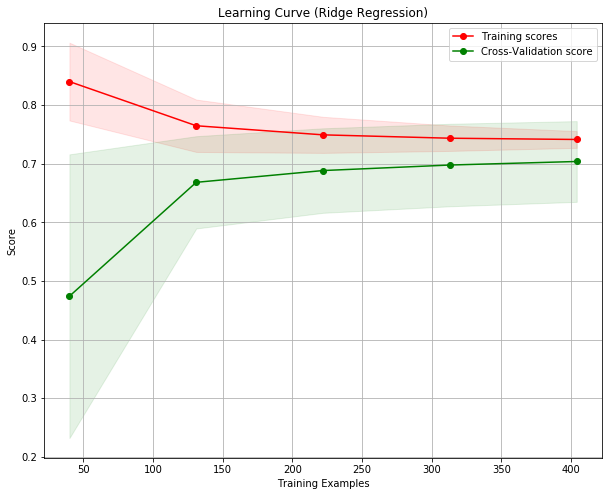

In [14]:
boston = load_boston()
X,y = boston.data, boston.target
title = "Learning Curve (Ridge Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = Ridge()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

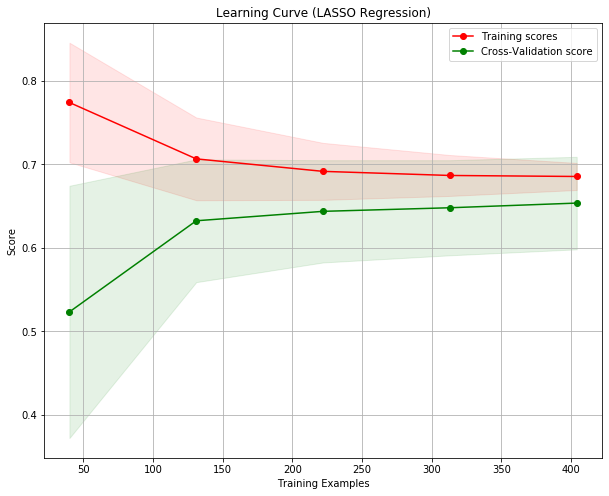

In [18]:
title = "Learning Curve (LASSO Regression)"
estimator = Lasso()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

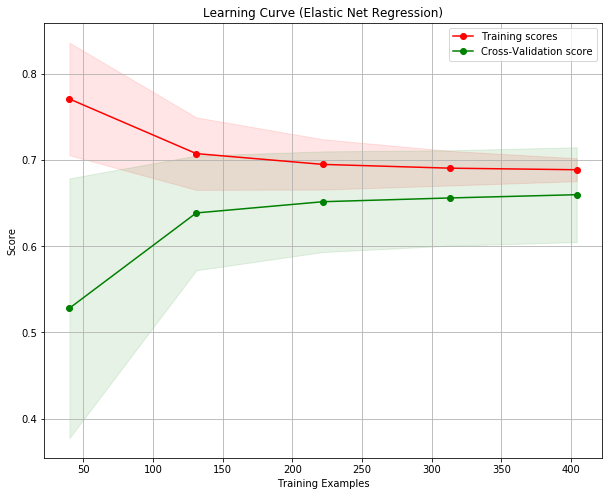

In [19]:
title = "Learning Curve (Elastic Net Regression)"
estimator = ElasticNet()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

### Validation Curve

In [20]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import validation_curve

In [30]:
np.random.seed(0)
boston = load_boston()
X,y = boston.data, boston.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X,y = X[indices], y[indices]
param_name = "alpha"
param_range = np.logspace(-5,2,10)
train_scores, valid_scores = validation_curve(Ridge(),X,y,param_name, param_range)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std= np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std= np.std(valid_scores, axis=1)


[[0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301353 0.72917054 0.74897077 0.75658608 0.70497479]
 [0.77301247 0.72916919 0.74896965 0.756585   0.70497354]
 [0.77297842 0.72912518 0.74893331 0.75655037 0.70493287]
 [0.77228874 0.7281616  0.74817798 0.75582878 0.7040692 ]
 [0.76863902 0.72215205 0.74391411 0.75177776 0.6990457 ]
 [0.76406744 0.71459653 0.7375499  0.74641495 0.69322072]
 [0.75112197 0.70098401 0.71983959 0.72934545 0.68236377]]
[[0.58922226 0.77799155 0.66791982 0.66801623 0.83953314]
 [0.58922165 0.77799206 0.66791997 0.66801588 0.83953301]
 [0.58921796 0.77799515 0.66792085 0.66801378 0.83953223]
 [0.58919587 0.77801364 0.66792606 0.66800121 0.83952755]
 [0.58906345 0.77812273 0.66795565 0.66792568 0.83949885]
 [0.58827374 0.77871876 0.66808144 0.66746987 0.83930713]
 [0.58399654 0.78090531 0.66788935 0.66490384 0.83783917]
 [0.57206631 

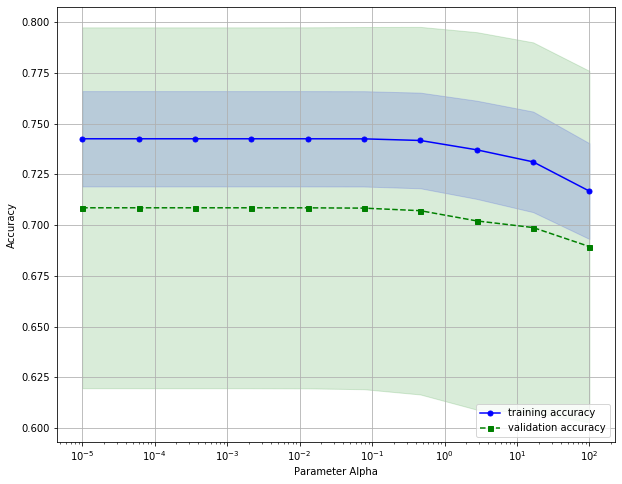

In [31]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle="--", marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc="lower right")
plt.xlabel('Parameter Alpha')
plt.ylabel('Accuracy')
plt.show()